In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data files

In [2]:
river_stations = pd.read_csv('river_stations_new.csv')

In [3]:
river_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
X                        62 non-null int64
GRDC-No.                 62 non-null int64
River                    62 non-null object
Station                  62 non-null object
Country                  62 non-null object
Latitude(DD)             62 non-null float64
Longitude(DD)            62 non-null float64
Catchmentarea(km²)       62 non-null float64
Altitude(mASL)           62 non-null float64
Nextdownstreamstation    62 non-null object
Weather_Station          62 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 5.4+ KB


In [4]:
river_data = pd.read_csv('river_data.csv')

In [16]:
print(river_data.info())
river_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923304 entries, 0 to 923303
Data columns (total 4 columns):
station_no     923304 non-null int64
date           923304 non-null object
discharge      923304 non-null float64
water_level    923304 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ MB
None


,station_no,date,discharge,water_level
0,6335020,1965-01-01,1530.0,163.0
1,6335020,1965-01-02,1780.0,210.0
2,6335020,1965-01-03,2080.0,260.0
3,6335020,1965-01-04,2140.0,270.0
4,6335020,1965-01-05,2110.0,265.0


In [127]:
stations = river_data.station_no.unique()
data_per_station = len(river_data)/len(stations)
    
print(f'For each station, there are {data_per_station:1.1f} days of data.')

For each station, there are 14892.0 days of data.


In [65]:
weather_stations = pd.read_csv('weather_stations.csv')
weather_data = pd.read_csv('weather_data.csv')

In [66]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
STATIONS_ID    54 non-null int64
LATITUDE       54 non-null float64
LONGITUDE      54 non-null float64
CITY           54 non-null object
STATE          54 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [67]:
print(weather_data.info())
weather_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734192 entries, 0 to 734191
Data columns (total 6 columns):
STATIONS_ID    734192 non-null int64
MESS_DATUM     734192 non-null object
RS             734192 non-null float64
RSF            734192 non-null int64
SH_TAG         734192 non-null int64
NSH_TAG        734192 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 33.6+ MB
None


,STATIONS_ID,MESS_DATUM,RS,RSF,SH_TAG,NSH_TAG
0,105,1965-01-01,3.5,8,-999,-999
1,105,1965-01-02,1.9,8,-999,-999
2,105,1965-01-03,2.2,8,-999,-999
3,105,1965-01-04,0.0,0,-999,-999
4,105,1965-01-05,0.6,1,-999,-999


The data contains information about the stations on the river in the `river_data` and specific geographical details are given in `river_stations`.

Similarly, the data regarding weather in an area is given in the `weather_data` and specific geographical details about it are given in `weather_stations`.

The main objective of this analysis is to accurately predict the **water data** in *river data*.

# Missing Values Handling

The unavailable values are tagged as `-999`. In order to carry out analysis, we must look at number of values that are not available.

## 1. River Data

In [83]:
river_data.head()

,station_no,date,discharge,water_level
0,6335020,1965-01-01,1530.0,163.0
1,6335020,1965-01-02,1780.0,210.0
2,6335020,1965-01-03,2080.0,260.0
3,6335020,1965-01-04,2140.0,270.0
4,6335020,1965-01-05,2110.0,265.0


In [133]:
river_data['date'] = pd.to_datetime(river_data['date'])

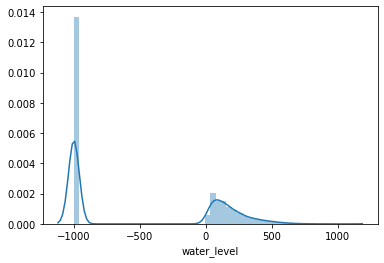

This plot show that there are a lot of missing values for the output water_level


In [89]:
sns.distplot(river_data.water_level)
plt.show()

print('This plot show that there are a lot of missing values for the output water_level')

In [95]:
total = len(river_data)
missing_y = len(river_data[river_data.water_level==-999])

print(f'We are missing {missing_y:1.0f} outputs out of {total:1.0f} data points, which is {missing_y/total*100:1.2f}% of the total data')

We are missing 521311 outputs out of 923304 data points, which is 56.46% of the total data


In [101]:
stn_group = river_data.groupby(['station_no']).mean()
stn_group.head()

,discharge,water_level
station_no,,
6335020,2391.539710,327.038746
6335030,72.867494,-999.000000
6335031,28.804855,146.986763
6335032,9.280686,61.567418
6335045,53.083916,79.726904


At station_no 6335030, all of the `water_level` data is missing since the mean is exactly -999. Lets check if it's true for other stations.

In [100]:
stn_group[stn_group.water_level==-999]

,discharge,water_level
station_no,,
6335030,72.867494,-999.0
6335070,2151.997613,-999.0
6335100,1741.504364,-999.0
6335240,172.920621,-999.0
6335301,114.163799,-999.0
6335302,135.995132,-999.0
6335304,194.595907,-999.0
6335310,10.208566,-999.0
6335350,34.916203,-999.0


From above, we see that majority of the stations don't contain any data (possibly not being a major node). For model fitting, we have to avoid these Stations.

In [106]:
stn_group.water_level.sort_values()

station_no
6935540   -999.000000
6335240   -999.000000
6335301   -999.000000
6335302   -999.000000
6335304   -999.000000
6335310   -999.000000
6335350   -999.000000
6335351   -999.000000
6335400   -999.000000
6935500   -999.000000
6335450   -999.000000
6335460   -999.000000
6335730   -999.000000
6335600   -999.000000
6335601   -999.000000
6335602   -999.000000
6336500   -999.000000
6935020   -999.000000
6435060   -999.000000
6335621   -999.000000
6935401   -999.000000
6935400   -999.000000
6935302   -999.000000
6335070   -999.000000
6935051   -999.000000
6935301   -999.000000
6335030   -999.000000
6935300   -999.000000
6935060   -999.000000
6335100   -999.000000
              ...    
6935053   -999.000000
6935145   -999.000000
6935460   -999.000000
6335190     36.729566
6335640     37.504365
6335710     53.945004
6335032     61.567418
6335076     64.033978
6335410     71.765310
6335045     79.726904
6335116     86.776457
6335603     90.423247
6335125    100.436006
6335081    133.675047

In [104]:
missing_ = stn_group[stn_group.water_level==-999]
len(missing_)

35

In [108]:
available_ = stn_group[stn_group.water_level != -999]
len(available_)

27

In [111]:
use_stns = available_.index

In [120]:
stns = use_stns[0]

stn_dic = {}
for stn in use_stns:
    stn_dic[stn] = (len(river_data[(river_data.water_level==-999) & (river_data.station_no==stn)]))

In [121]:
stn_dic

{6335020: 0,
 6335031: 0,
 6335032: 0,
 6335045: 0,
 6335050: 0,
 6335060: 0,
 6335076: 0,
 6335080: 0,
 6335081: 0,
 6335082: 0,
 6335083: 0,
 6335115: 0,
 6335116: 0,
 6335125: 0,
 6335150: 0,
 6335170: 0,
 6335180: 0,
 6335190: 0,
 6335200: 0,
 6335410: 0,
 6335500: 0,
 6335603: 0,
 6335604: 0,
 6335640: 0,
 6335710: 0,
 6335800: 91,
 6336050: 0}

It's observed that only station number **6335800** has missing data out of rest of the use cases. However, even that is a minor fraction (missing only 91 out of 14892 days of data). Let's check for the time periods when the data is missing.

In [129]:
river_data[(river_data.water_level==-999) & (river_data.station_no==6335800)].head(20)

,station_no,date,discharge,water_level
640428,6335800,1965-03-14,18.9,-999.0
640692,6335800,1966-01-20,42.6,-999.0
640763,6335800,1966-04-17,106.0,-999.0
640851,6335800,1966-07-30,45.6,-999.0
641084,6335800,1967-04-21,43.9,-999.0
641314,6335800,1968-01-24,101.0,-999.0
641386,6335800,1968-04-21,38.2,-999.0
641584,6335800,1968-12-07,22.6,-999.0
641681,6335800,1969-03-30,48.4,-999.0
641701,6335800,1969-04-19,108.0,-999.0


The data isn't missing at a stretch. So, we can't remove data for that time interval. Since the data is for time-series, skipping a value will affect the model data. To avoid skipping this station and since the missing values are very low, we will use average of the previous and next day.

In [168]:
river_data[(river_data.discharge==-999) & (river_data.water_level !=-999)].discharge= 2

C:\Users\Kanishk\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [169]:
river_data[(river_data.discharge==-999) & (river_data.water_level !=-999)]#.discharge

,station_no,date,discharge,water_level
729708,6335083,1/1/1965,-999.0,410.216
729709,6335083,1/2/1965,-999.0,399.089
729710,6335083,1/3/1965,-999.0,303.165
729711,6335083,1/4/1965,-999.0,257.270
729712,6335083,1/5/1965,-999.0,230.995
729713,6335083,1/6/1965,-999.0,220.812
729714,6335083,1/7/1965,-999.0,266.890
729715,6335083,1/8/1965,-999.0,366.308
729716,6335083,1/9/1965,-999.0,403.541
729717,6335083,1/10/1965,-999.0,440.823


In [ ]:
def agg_water(df):
    d0 = df.date.day
    d_prev = d0 + pd.Timedelta(days=-1)
    d_next = d0 + pd.Timedelta(days=1)

    lvl_prev = river_data[(river_data.date.dt.day==d_prev) & (river_data.station_no==6335800)].water_level
    lvl_next = river_data[(river_data.date.dt.day==d_next) & (river_data.station_no==6335800)].water_level

    
    return (lvl_next+lvl_prev) / 2
# val.value_counts().index[0]       # Getting the element with the maximum occurrence

river_data['water_level'] = river_data.apply(lambda x: agg_water(x) if (x.station_no== 6335800 and x.water_level == -999)
                                                                        else x.water_level, axis=1)

In [156]:
river_data[(river_data.water_level==-999) & (river_data.station_no==6335800)].head(20)

,station_no,date,discharge,water_level


In [159]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014,2016], 
        'reports': [4, 24, 31, 2, 3, 4]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma', 'SF'])
df

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3
SF,Amy,2016,4


In [171]:
df.loc['SF', 'name']=np.nan
df

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3
SF,NaN,2016,4


In [172]:
df.name = df.year.replace({2012:np.nan})

In [173]:
df

,name,year,reports
Cochice,NaN,2012,4
Pima,NaN,2012,24
Santa Cruz,2013.0,2013,31
Maricopa,2014.0,2014,2
Yuma,2014.0,2014,3
SF,2016.0,2016,4


In [160]:
df.drop(['Yuma', 'SF'])

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2


In [161]:
river_data[river_data.station_no==6335083].index

Int64Index([729708, 729709, 729710, 729711, 729712, 729713, 729714, 729715,
            729716, 729717,
            ...
            744590, 744591, 744592, 744593, 744594, 744595, 744596, 744597,
            744598, 744599],
           dtype='int64', length=14892)

In [175]:
river_data.discharge = river_data.discharge.replace({-999:np.nan})

In [176]:
river_data[river_data.station_no==6335083]#.index

,station_no,date,discharge,water_level
729708,6335083,1/1/1965,NaN,410.216
729709,6335083,1/2/1965,NaN,399.089
729710,6335083,1/3/1965,NaN,303.165
729711,6335083,1/4/1965,NaN,257.270
729712,6335083,1/5/1965,NaN,230.995
729713,6335083,1/6/1965,NaN,220.812
729714,6335083,1/7/1965,NaN,266.890
729715,6335083,1/8/1965,NaN,366.308
729716,6335083,1/9/1965,NaN,403.541
729717,6335083,1/10/1965,NaN,440.823


In [162]:
len(river_data)

923304

In [177]:
river_data.to_csv('river_data_2.csv')

In [174]:
river_data.head()#drop([])

,station_no,date,discharge,water_level
0,6935540,1/1/1965,7.66,-999.0
1,6935540,1/2/1965,8.23,-999.0
2,6935540,1/3/1965,8.23,-999.0
3,6935540,1/4/1965,9.24,-999.0
4,6935540,1/5/1965,8.04,-999.0


## 2. Weather Data

In [24]:
noRS_RSF = len( weather_data[weather_data.RS.isin([-999]) | weather_data.RSF.isin([-999])] )
print('Number of data points with no RS or RSF values:', noRS_RSF)      

weather_data[weather_data.RS.isin([-999]) | weather_data.RSF.isin([-999])].head()

Number of data points with no RS or RSF values: 61


,STATIONS_ID,MESS_DATUM,RS,RSF,SH_TAG,NSH_TAG
146219,942,1968-01-06,17.0,-999,-999,-999
174158,1072,2012-02-01,-999.0,-999,0,0
174159,1072,2012-02-02,-999.0,-999,0,0
174160,1072,2012-02-03,-999.0,-999,0,0
174161,1072,2012-02-04,-999.0,-999,0,0


In [82]:
len(weather_data)

734192

Since only a minute fraction of data is missing, we'll use the naive approach of filling the data with mean (for numerical) and mode (for categorical) for the data in the respective month.

In [69]:
weather_data['MESS_DATUM'] = pd.to_datetime(weather_data['MESS_DATUM'])

In [ ]:
weather_data[weather_data.RS.isin([-999]) | weather_data.RSF.isin([-999])].apply()

In [31]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734192 entries, 0 to 734191
Data columns (total 6 columns):
STATIONS_ID    734192 non-null int64
MESS_DATUM     734192 non-null datetime64[ns]
RS             734192 non-null float64
RSF            734192 non-null int64
SH_TAG         734192 non-null int64
NSH_TAG        734192 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 33.6 MB


In [74]:
def avg_RS(df):
    mon = df.MESS_DATUM.month
    mean_RS = np.mean(weather_data[weather_data.MESS_DATUM.dt.month==mon].RS)
    return mean_RS
    
weather_data['RS'] = weather_data.apply(lambda x: avg_RS(x) if x.RS == -999 else x.RS, axis=1)

In [75]:
weather_data[weather_data.RS.isin([-999]) | weather_data.RSF.isin([-999])]

,STATIONS_ID,MESS_DATUM,RS,RSF,SH_TAG,NSH_TAG
146219,942,1968-01-06,17.000000,-999,-999,-999
174158,1072,2012-02-01,1.936902,-999,0,0
174159,1072,2012-02-02,1.936902,-999,0,0
174160,1072,2012-02-03,1.936902,-999,0,0
174161,1072,2012-02-04,1.936902,-999,0,0
174162,1072,2012-02-05,1.936902,-999,0,0
174163,1072,2012-02-06,1.936902,-999,0,0
174164,1072,2012-02-07,1.936902,-999,0,0
174165,1072,2012-02-08,1.936902,-999,1,1
174166,1072,2012-02-09,1.936902,-999,1,0


In [79]:
def mode_RSF(df):
    mon = df.MESS_DATUM.month
    val = weather_data[weather_data.MESS_DATUM.dt.month==mon].RSF
    return val.value_counts().index[0]       # Getting the element with the maximum occurrence

weather_data['RSF'] = weather_data.apply(lambda x: mode_RSF(x) if x.RSF == -999 else x.RSF, axis=1)

In [80]:
weather_data[weather_data.RS.isin([-999]) | weather_data.RSF.isin([-999])]

,STATIONS_ID,MESS_DATUM,RS,RSF,SH_TAG,NSH_TAG


Now that the values of RS & RSF have been filled, it's important to fill in the data for `SH_TAG` and `NSH_TAG`

In [81]:
river_data.head()

,station_no,date,discharge,water_level
0,6335020,1965-01-01,1530.0,163.0
1,6335020,1965-01-02,1780.0,210.0
2,6335020,1965-01-03,2080.0,260.0
3,6335020,1965-01-04,2140.0,270.0
4,6335020,1965-01-05,2110.0,265.0


In [182]:
weather_data.to_csv('weather_data_2.csv')